In [1]:
from influxdb import DataFrameClient as db_con
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
client = db_con(host='34.122.223.6', port=8086, username='challenge', password='chall3ng3', database='industrial_equipment', retries= 1)

In [3]:
client.ping()

'1.8.0'

In [4]:
df = pd.DataFrame()

In [5]:
''''
    Para a análise de dados, selecionamos apenas os atributos "component" e "object_temp", pois, conforme o enunciado do desafio, o campo de velocidade - vel_rms_e pode ser
    desprezado da análise.
    Para obter as observações de cada tipo de componente, é executado a query abaixo, variando o "component" entre 1 a 8
'''

for i in range(1, 9):
    df = pd.concat([df, client.query(f"SELECT component, object_temp FROM serialized WHERE component='{i}'")["serialized"]])

In [6]:
df.head()

,component,object_temp
2021-12-05 00:00:01+00:00,1,48.21
2021-12-05 00:00:02+00:00,1,48.21
2021-12-05 00:00:03+00:00,1,48.21
2021-12-05 00:00:04+00:00,1,48.21
2021-12-05 00:00:05+00:00,1,48.21


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24063392 entries, 2021-12-05 00:00:01+00:00 to 2022-02-06 23:59:59+00:00
Data columns (total 2 columns):
 #   Column       Dtype  
---  ------       -----  
 0   component    object 
 1   object_temp  float64
dtypes: float64(1), object(1)
memory usage: 550.8+ MB


In [8]:
len(df[df["object_temp"] == 0])

0

In [9]:
df_grouped = df.groupby("component")["object_temp"].mean()

In [10]:
df_grouped.head()

component
1    45.360847
2    70.331641
3    54.295471
4    51.708305
5    41.248457
Name: object_temp, dtype: float64

<AxesSubplot:xlabel='component'>

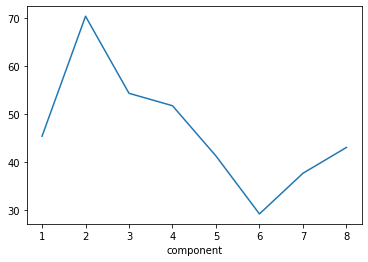

In [11]:
df_grouped.plot()

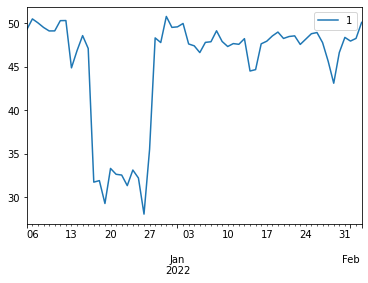

<Figure size 1200x600 with 0 Axes>

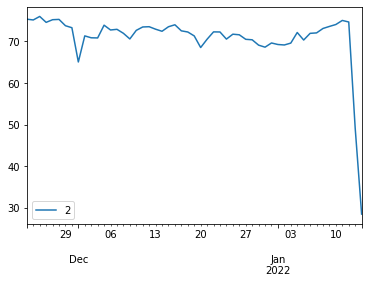

<Figure size 1200x600 with 0 Axes>

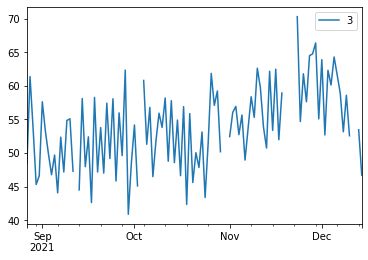

<Figure size 1200x600 with 0 Axes>

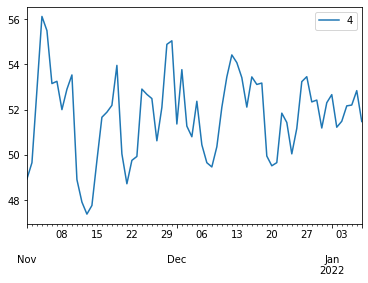

<Figure size 1200x600 with 0 Axes>

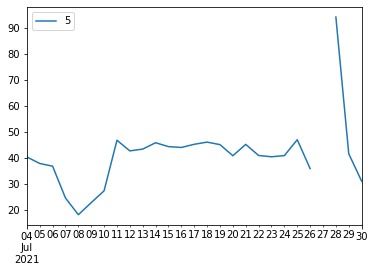

<Figure size 1200x600 with 0 Axes>

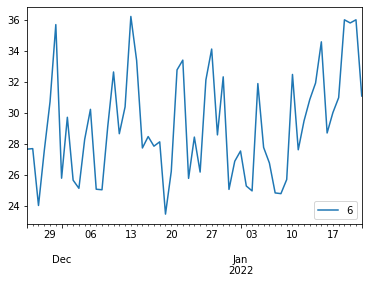

<Figure size 1200x600 with 0 Axes>

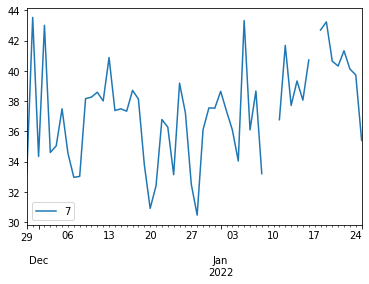

<Figure size 1200x600 with 0 Axes>

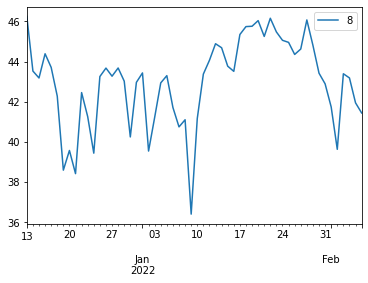

<Figure size 1200x600 with 0 Axes>

In [12]:
'''
    Conforme resultado abaixo...
'''

for i in range(1, 9):
    df[df["component"] == f'{i}'].groupby(pd.Grouper(freq='d')).mean().plot()
    plt.legend([f"{i}"])
    plt.figure(figsize=(8, 4), dpi=150)